<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/hml_ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10! : Introduction to Artificial Neural Networks with Keras 🧠

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [2]:
y_pred

array([ True, False])

The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:

In [3]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = "perceptron", penalty = None,
                        learning_rate = "constant", eta0= 1, random_state = 42)

sgd_clf.fit(X, y)

assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:



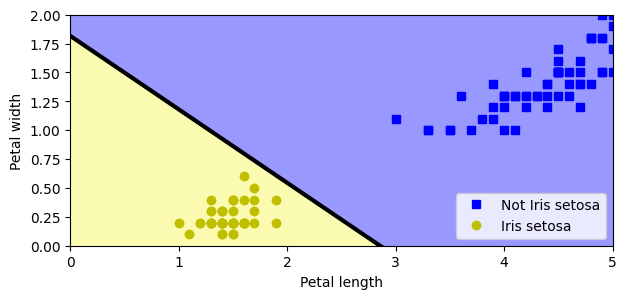

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

(-4.5, 4.5, -0.2, 1.2)

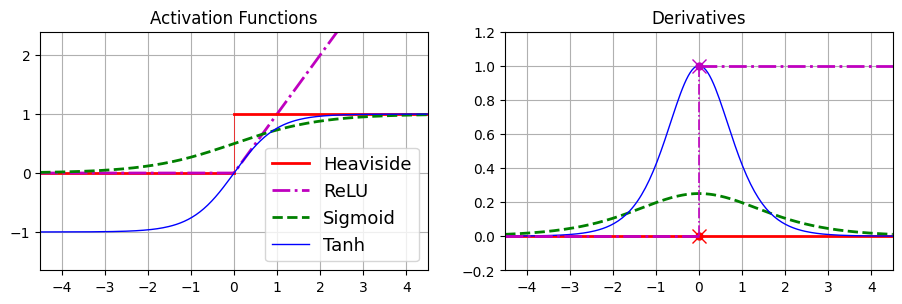

In [5]:
# Activation functions

from scipy.special import expit as sigmoid

def relu(z):
  return np.maximum(0, z)

def derivative (f, z, eps=0.000001):
  return (f(z+eps)-f(z-eps))/ (2* eps)

max_z = 4.5
z = np.linspace (-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0 ],"r-", linewidth = 2, label = "Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth = 0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth = 2)
plt.plot(z, sigmoid(z), "g--", linewidth = 2, label ="Sigmoid")
plt.plot(z, np.tanh(z), "b", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation Functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])



##The Multilayer Perceptron and Backpropagation


### Regression MLPs

In [6]:
"""
The following code:
1. fetching and splitting the dataset
2.creates a pipeline to standardize the input features before sending them to
the MLPRegressor.  very important : gradient descent does not converge very well
 when the features have very different scales.
3. code trains the model and evaluates its validation error.
model uses the ReLU activation function in the hidden layers,
uses a variant of gradient descent called Adam  to minimize the MSE
a little bit of ℓ2 regularization (you can control via the alpha hyperparameter):
"""
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes = [50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared = False)

In [7]:
rmse

0.5053326657968679

### Classification MLPs

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

## Implementing MLPs with Keras

### using keras to get datasets

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [9]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[: -5000], y_train_full[: -5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
X_train.shape

(55000, 28, 28)

In [11]:
X_train.dtype

dtype('uint8')

In [12]:
#scale the pixel intensities down to the 0–1 range by dividing them
#by 255.0 (this also converts them to floats):

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [13]:
class_names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(-0.5, 27.5, 27.5, -0.5)

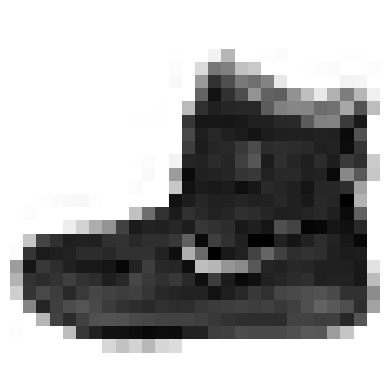

In [14]:
#plot an image using Matplotlib's imshow() function, with a 'binary' color map

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')


In [15]:
class_names[y_train[0]]

'Ankle boot'

In [16]:
y_train[0]

9

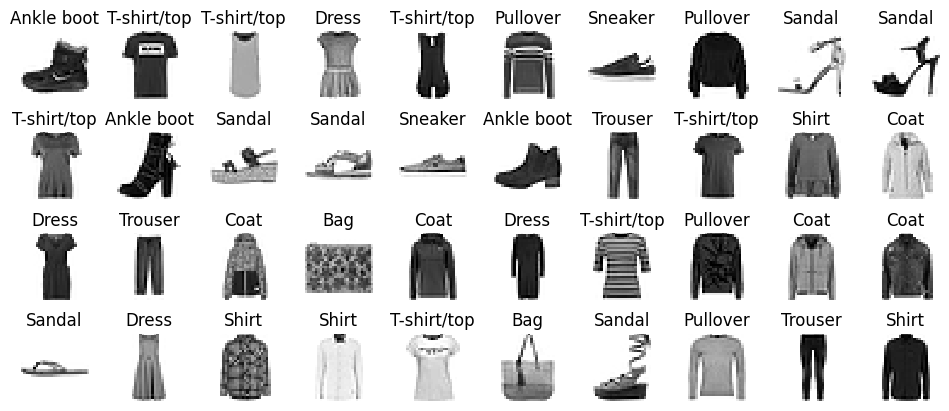

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)


### Creating the model using the sequential API

In [18]:
# a calssification MLP with 2 hidden layers
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [19]:
"""it’s often more convenient to pass a list of layers
when creating the Sequential model. You can also drop the Input
layer and instead specify the input_shape in the first layer:
"""
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


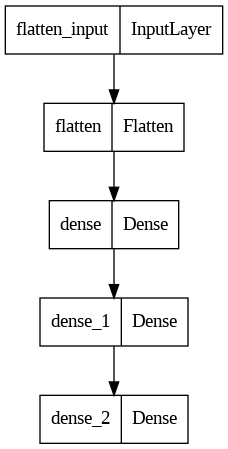

In [21]:
tf.keras.utils.plot_model(model)

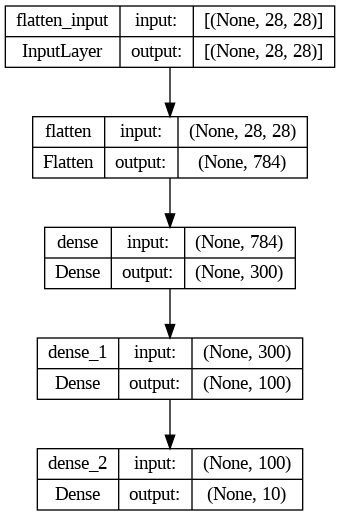

In [22]:

tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [23]:
# get a model's layers
model.layers

In [24]:
hidden1 = model.layers[1]
hidden1

In [25]:
hidden1.name

'dense'

In [26]:
model.get_layer("dense")


In [27]:
model.get_layer("dense") is hidden1

True

In [28]:
"""All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both connection weights
and the bias terms"""

weights, biases = hidden1.get_weights()


In [29]:
weights

array([[ 0.05124776, -0.01591511,  0.03471094, ...,  0.01338357,
        -0.02032324, -0.04324155],
       [ 0.03211258,  0.00679814, -0.01112641, ..., -0.03737185,
         0.03276838, -0.0267686 ],
       [-0.00844231, -0.02190591,  0.0076476 , ...,  0.01133045,
        -0.04828714, -0.06228053],
       ...,
       [-0.0297003 , -0.02755379, -0.04100225, ..., -0.00419958,
        -0.03052761, -0.00333844],
       [ 0.02528955,  0.01662461, -0.05043431, ...,  0.04206521,
         0.01526819, -0.04157861],
       [-0.05677401, -0.04112103, -0.05131105, ..., -0.06128416,
        -0.06049071, -0.05071515]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [33]:
# compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

In [34]:
#this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [35]:
#  convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Note: it's important to set num_classes when the number of classes is greater than the maximum class id in the sample.

In [36]:
# to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

In [37]:
#Training and evaluating the model

history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7147 - sparse_categorical_accuracy: 0.7647 - val_loss: 0.4995 - val_sparse_categorical_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4838 - sparse_categorical_accuracy: 0.8332 - val_loss: 0.4609 - val_sparse_categorical_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4383 - sparse_categorical_accuracy: 0.8456 - val_loss: 0.4239 - val_sparse_categorical_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4141 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.3965 - val_sparse_categorical_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3933 - sparse_categorical_accuracy: 0.8624 - val_loss: 0.3918 - val_sparse_categorical_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3767 - spars

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
history.history

{'loss': [0.714667558670044,
  0.48376306891441345,
  0.43832138180732727,
  0.4141451418399811,
  0.3933145999908447,
  0.37672412395477295,
  0.3639097511768341,
  0.35216963291168213,
  0.3412706255912781,
  0.3310134708881378,
  0.32237276434898376,
  0.3141497075557709,
  0.3069610893726349,
  0.2996140122413635,
  0.29359665513038635,
  0.2858753204345703,
  0.2811160683631897,
  0.2752111852169037,
  0.26984649896621704,
  0.2647155821323395,
  0.2597506046295166,
  0.25440719723701477,
  0.25059783458709717,
  0.24470335245132446,
  0.24067215621471405,
  0.23760169744491577,
  0.23197895288467407,
  0.2290761023759842,
  0.22479476034641266,
  0.221501424908638],
 'sparse_categorical_accuracy': [0.7647091150283813,
  0.8332363367080688,
  0.8456000089645386,
  0.8557636141777039,
  0.8624181747436523,
  0.867618203163147,
  0.8707273006439209,
  0.8755999803543091,
  0.8789636492729187,
  0.8811636567115784,
  0.8849090933799744,
  0.8871999979019165,
  0.8907454609870911,
  0

<Axes: xlabel='Epoch'>

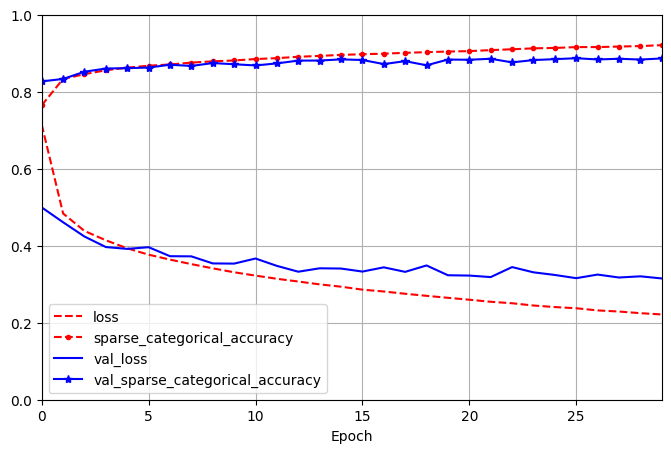

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim = [0, 29], ylim = [0, 1], grid = True, xlabel="Epoch",
    style = ["r--", "r--.","b-", "b-*"])

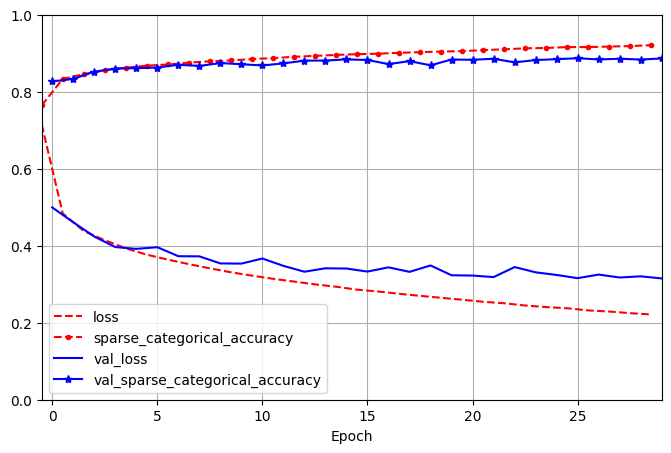

In [43]:
#shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3241 - sparse_categorical_accuracy: 0.8847


[0.3240964412689209, 0.8847000002861023]

In [45]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 62ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]


In [49]:
y_new

array([9, 2, 1], dtype=uint8)

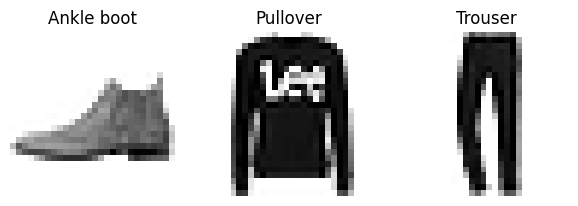

In [50]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Building a Regression MLP Using the Sequential API


In [51]:
# load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [52]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1) #no activation here
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer = optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.7969 - root_mean_squared_error: 0.8927 - val_loss: 1.0620 - val_root_mean_squared_error: 1.0305
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3900 - root_mean_squared_error: 0.6245 - val_loss: 2.3274 - val_root_mean_squared_error: 1.5256
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3812 - root_mean_squared_error: 0.6174 - val_loss: 0.4188 - val_root_mean_squared_error: 0.6472
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3426 - root_mean_squared_error: 0.5853 - val_loss: 0.3201 - val_root_mean_squared_error: 0.5657
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3310 - root_mean_squared_error: 0.5753 - val_loss: 0.6255 - val_root_mean_squared_error: 0.7909
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3252 - root_mean_squared_error: 0.5702 - val_loss: 0.9194 - val_

In [53]:
mse_test, rmse_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 916us/step - loss: 0.2788 - root_mean_squared_error: 0.5281


In [54]:
rmse_test

0.528056263923645

In [55]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 52ms/step


In [56]:
y_pred

array([[0.55308986],
       [0.97005713],
       [4.986783  ]], dtype=float32)

## Building Complex Models Using the Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [57]:
# reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [58]:

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1=tf.keras.layers.Dense(30, activation="relu")
hidden_layer2=tf.keras.layers.Dense(30, activation="relu")
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1977 - root_mean_squared_error: 1.0944 - val_loss: 0.5791 - val_root_mean_squared_error: 0.7610
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4557 - root_mean_squared_error: 0.6750 - val_loss: 0.8300 - val_root_mean_squared_error: 0.9110
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4034 - root_mean_squared_error: 0.6351 - val_loss: 0.4171 - val_root_mean_squared_error: 0.6458
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3784 - root_mean_squared_error: 0.6151 - val_loss: 0.4161 - val_root_mean_squared_error: 0.6451
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3676 - root_mean_squared_error: 0.6063 - val_loss: 0.7402 - val_root_mean_squared_error: 0.8603
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3596 - root_mean_squared_error: 0.5996 - val_loss: 1.3411 - val_

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [61]:
# what if we wanna split the inputs?
tf.random.set_seed(42)
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation = "relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = "relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output])

In [62]:
# now we compile the model:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = "mse", optimizer = optimizer, metrics = ["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide , X_test_deep = X_test [:, :5], X_test[:, 2:]

X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data = ((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2897 - root_mean_squared_error: 1.1356 - val_loss: 1.4452 - val_root_mean_squared_error: 1.2022
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4968 - root_mean_squared_error: 0.7049 - val_loss: 2.6912 - val_root_mean_squared_error: 1.6405
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4541 - root_mean_squared_error: 0.6739 - val_loss: 0.8607 - val_root_mean_squared_error: 0.9277
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4129 - root_mean_squared_error: 0.6426 - val_loss: 0.6590 - val_root_mean_squared_error: 0.8118
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4143 - root_mean_squared_error: 0.6436 - val_loss: 2.5912 - val_root_mean_squared_error: 1.6097
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3999 - root_mean_squared_error: 0.6324 - val_loss: 2.3426 - val_

In [63]:
# Adding an auxiliary output for regularization:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


In [64]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [66]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.6076 - dense_2_loss: 1.5508 - dense_3_loss: 2.1185 - dense_2_root_mean_squared_error: 1.2453 - dense_3_root_mean_squared_error: 1.4555 - val_loss: 0.7598 - val_dense_2_loss: 0.6494 - val_dense_3_loss: 1.7530 - val_dense_2_root_mean_squared_error: 0.8058 - val_dense_3_root_mean_squared_error: 1.3240
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5400 - dense_2_loss: 0.5235 - dense_3_loss: 0.6885 - dense_2_root_mean_squared_error: 0.7235 - dense_3_root_mean_squared_error: 0.8298 - val_loss: 0.5353 - val_dense_2_loss: 0.5087 - val_dense_3_loss: 0.7748 - val_dense_2_root_mean_squared_error: 0.7132 - val_dense_3_root_mean_squared_error: 0.8802
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4583 - dense_2_loss: 0.4468 - dense_3_loss: 0.5622 - dense_2_root_mean_squared_error: 0.6684 - dense_3_root_mean_squared_error: 0.7498 - val_loss: 0.4376 - val_dense_2_loss

In [67]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 1ms/step - loss: 0.3360 - dense_2_loss: 0.3301 - dense_3_loss: 0.3891 - dense_2_root_mean_squared_error: 0.5746 - dense_3_root_mean_squared_error: 0.6238


In [68]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 60ms/step


In [69]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 17ms/step


In [70]:

y_pred

{'dense_2': array([[0.3507319],
        [1.2063597],
        [3.5757422]], dtype=float32),
 'dense_3': array([[0.46682823],
        [1.2014563 ],
        [3.2968717 ]], dtype=float32)}

## Using the Subclassing API to Build Dynamic Models

In [71]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) #needed to support naming the model
    self.norm_layer_wide = tf.keras.layers.Normalization()
    self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1= tf.keras.layers.Dense(units, activation=activation)
    self.hidden2=tf.keras.layers.Dense(units, activation=activation)
    self.main_output=tf.keras.layers.Dense(1)
    self.aux_output=tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output =  self.aux_output(hidden2)
    return output, aux_output


In [74]:
tf.random.set_seed(42)


In [75]:
model = WideAndDeepModel(30, activation="relu", name ="my_cool_model")

In [76]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history= model.fit(
    (X_train_wide, X_train_deep),(y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide,X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.6772 - output_1_loss: 1.6072 - output_2_loss: 2.3072 - output_1_root_mean_squared_error: 1.2677 - output_2_root_mean_squared_error: 1.5189 - val_loss: 1.2070 - val_output_1_loss: 1.1717 - val_output_2_loss: 1.5251 - val_output_1_root_mean_squared_error: 1.0824 - val_output_2_root_mean_squared_error: 1.2350
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5526 - output_1_loss: 0.5281 - output_2_loss: 0.7728 - output_1_root_mean_squared_error: 0.7267 - output_2_root_mean_squared_error: 0.8791 - val_loss: 0.6905 - val_output_1_loss: 0.6002 - val_output_2_loss: 1.5026 - val_output_1_root_mean_squared_error: 0.7747 - val_output_2_root_mean_squared_error: 1.2258
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4473 - output_1_loss: 0.4328 - output_2_loss: 0.5786 - output_1_root_mean_squared_error: 0.6578 - output_2_root_mean_squared_error: 0.7607 - val_loss: 0.538

1/1 [==============================] - 0s 85ms/step


In [77]:
weighted_sum_of_losses

0.3585387170314789

## Saving and Restoring Models

In [81]:
#delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [82]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [83]:
model.save("my_keras_model", save_format = "tf")

In [84]:
#show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index
